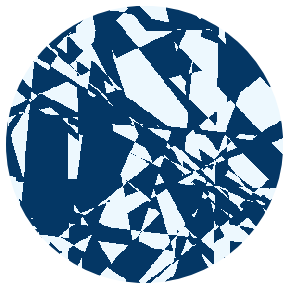

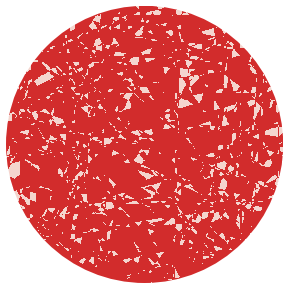

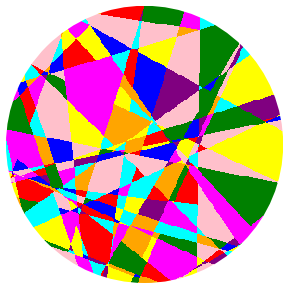

In [1]:
from helper_functions_analytic import *
from helper_functions_plotting import *

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', dpi=60)  # smaller default display dpi

### Figure 1 ###

frozen_lake_colors = ['#043765', "#edf8fe"]
meat_colors = ['#d22c2c', '#f4d5ce']
rainbow_colors = ['red', 'blue', 'green', 'purple', 'orange',\
     'yellow', 'pink', 'cyan', 'magenta', 'navy']

res = 300

rad = 20
cutoff = .65
fig1 = plot_hyperplanes_color_2D(rad, res, colorcutoffs=np.array([cutoff]), cmap_list = frozen_lake_colors, preview_dpi=100)

rad = 75
cutoff = .87
fig2 = plot_hyperplanes_color_2D(rad, res, colorcutoffs=np.array([cutoff]), cmap_list = meat_colors, preview_dpi=100)

rad = 10
cutoffs = np.linspace(.1,1,9)
fig3 = plot_hyperplanes_color_2D(rad, res, colorcutoffs=cutoffs, cmap_list = rainbow_colors, preview_dpi=100)

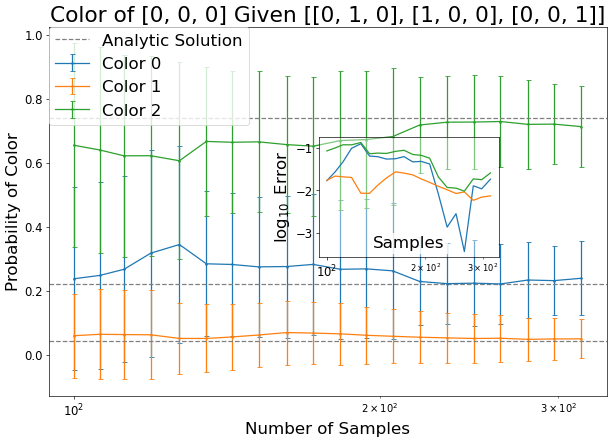

In [2]:
### Figure 2 ###

gridpoints = np.array([[0,1,0],[1,0,0], [0,0,1], [0,0,0]])
d = 3
max_samples_power = 2.5
samples_array = np.logspace(2, max_samples_power, 20, dtype=int)
num_monte_carlo_runs = 20
color_dist = (0.1,.1,.8)
colors = (0,2,2)

fig, ax, probs_mean, probs_std =  plot_mc_colors_with_errorbars(d, gridpoints, color_dist, colors,\
                                            samples_array, num_monte_carlo_runs, analytic_probs=True)

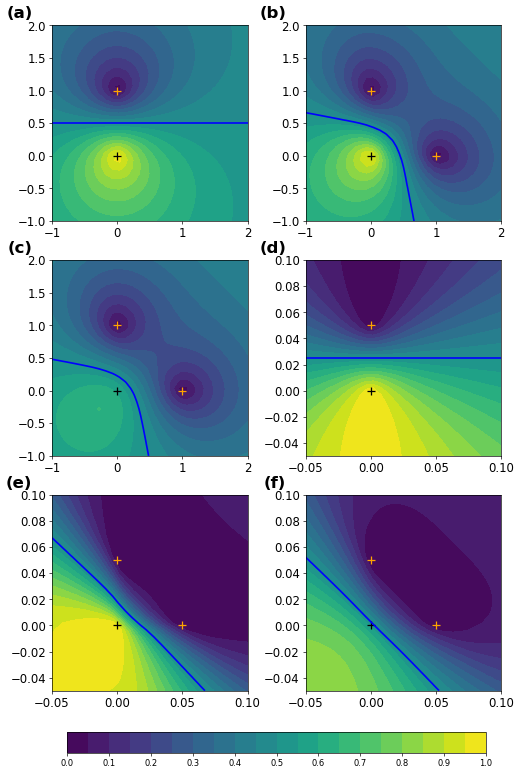

In [3]:
### Figure 3 ###

figure_3_helper(color_dist = (0.5,0.5), grid_resolution = 30)

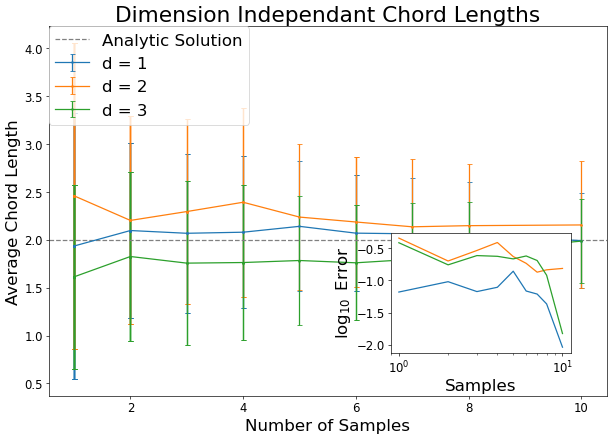

In [5]:
### Supplement Figure 1 ###

r = 16  # Gives accuracy within e^-r
resolution = 400
color_dist = (0.5, 0.5)
max_samples_power = 1
samples_array = np.logspace(0, max_samples_power, 20, dtype=int)
num_monte_carlo_runs = 20

# Main plotting function
fig, ax, chord_lengths_mean, stdev = \
    plot_mc_chord_lengths_with_errorbars(r, resolution, color_dist, samples_array, num_monte_carlo_runs)

# Calculate analytic solution
analytic_solution = 0
for color_prob in color_dist:
    analytic_solution += color_prob / (1 - color_prob)

# Calculate log differences for the inset
log_differences = np.log10(np.abs(analytic_solution - chord_lengths_mean))

# Add inset axis
inset_ax = fig.add_axes([0.6, 0.2, 0.25, 0.25])  # [left, bottom, width, height] in normalized figure coords
for d in (1, 2, 3):
    inset_ax.plot(samples_array, log_differences[d - 1], label=f'd={d}')

inset_ax.set_xscale('log')
inset_ax.set_xlabel('Samples', fontsize=20)
inset_ax.set_ylabel(r'$\log_{10}$ Error', fontsize=20)
inset_ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()


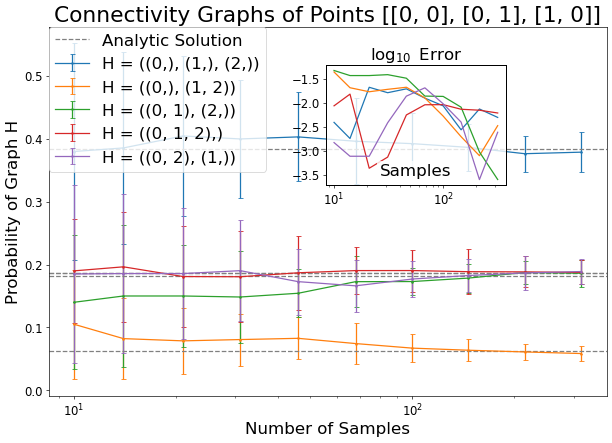

In [6]:
### Supplement Figure 3 ###
#comparing analytic P(connectivity graph) to monte carlo estimate

d = 2
gridpoints = np.array([[0, 0], [0, 1], [1, 0]])
max_samples_power = 2.5
samples_array = np.logspace(1, max_samples_power, 10, dtype=int)
num_monte_carlo_runs = 20

none_connected = (1-np.e**(-1+1/np.sqrt(2)))*(2-2*np.e**(-1/np.sqrt(2))-(1-np.e**(-1/np.sqrt(2)))**2)\
+(1-np.e**(-1/np.sqrt(2)))**2*(np.e**(-1+1/np.sqrt(2)))
all_connected = (np.e**(-1/np.sqrt(2)))/np.e
Bslash = (1-np.e**(-1*(1-1/np.sqrt(2))))/np.e**np.sqrt(2) #B is the 0,0,0 point
Aslash = (1-np.e**(-1/np.sqrt(2)))/np.e #A refers to either of the two symmetric points 0,1,0 or 1,0,0
Cslash = Aslash

analytic_probs = {((0,), (1,), (2,)): none_connected, ((0, 1, 2),): all_connected, \
                    ((0, 1), (2,)): Aslash, ((0, 2), (1,)): Cslash, ((0,), (1, 2)): Bslash}


# Call the wrapper function
fig, ax, probs_mean, probs_std = monte_carlo_convergence_with_error_bars(
    d, gridpoints=gridpoints, samples_array=samples_array, num_runs=num_monte_carlo_runs, analytic_probs=analytic_probs)



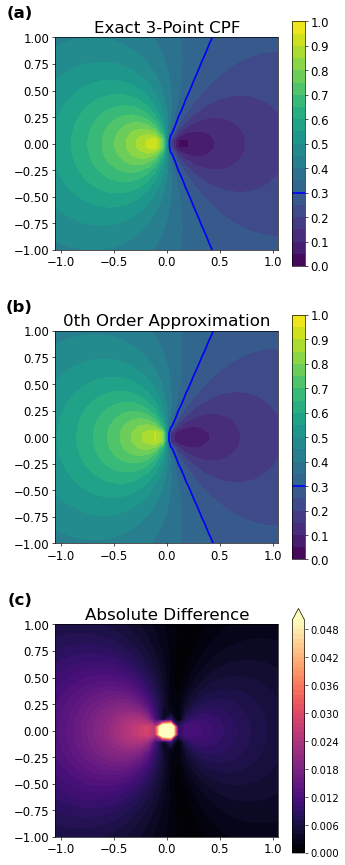

In [7]:
### Supplement Figure 4 ###

# m scales the length between the points
supplement_figure_4_helper(m = 1, color_dist = (0.3,0.7), grid_resolution = 30)